In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("BreadBasket_DMS.csv")

In [3]:
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [13]:
data.query("Item=='coffee'").Transaction.nunique()

4528

In [19]:
data.query("Item=='coffee'").drop_duplicates("Transaction").shape[0]

4528

In [22]:
data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,bread
1,2016-10-30,10:05:34,2,scandinavian
2,2016-10-30,10:05:34,2,scandinavian
3,2016-10-30,10:07:57,3,hot chocolate
4,2016-10-30,10:07:57,3,jam
5,2016-10-30,10:07:57,3,cookies
6,2016-10-30,10:08:41,4,muffin
7,2016-10-30,10:13:03,5,coffee
8,2016-10-30,10:13:03,5,pastry
9,2016-10-30,10:13:03,5,bread


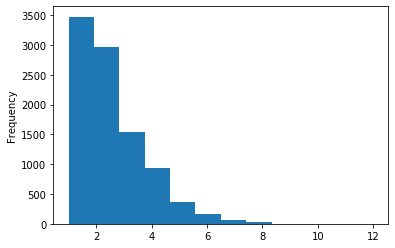

In [28]:
data.groupby("Transaction").size().plot.hist(bins=12)

In [23]:
data.groupby("Transaction").size().idxmax()

6474

In [25]:
data.groupby("Transaction").size().max()

12

In [5]:
data.Item=data.Item.str.lower()

In [7]:
data.Item.nunique()

95

In [10]:
data.Item.value_counts()[:10]

coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
none              786
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
Name: Item, dtype: int64

In [30]:
"1"+"2"

'12'

In [39]:
data.drop(labels=["date-time"],axis=1,inplace=True)

In [44]:
data.tail()

,Date,Time,Transaction,Item,date_time
21288,2017-04-09,14:32:58,9682,coffee,2017-04-09 14:32:58
21289,2017-04-09,14:32:58,9682,tea,2017-04-09 14:32:58
21290,2017-04-09,14:57:06,9683,coffee,2017-04-09 14:57:06
21291,2017-04-09,14:57:06,9683,pastry,2017-04-09 14:57:06
21292,2017-04-09,15:04:24,9684,smoothies,2017-04-09 15:04:24


In [36]:
data["date_time"]=data.Date+" "+data.Time

In [43]:
data.date_time=pd.to_datetime(data["date_time"])

In [45]:
data.date_time

0       2016-10-30 09:58:11
1       2016-10-30 10:05:34
2       2016-10-30 10:05:34
3       2016-10-30 10:07:57
4       2016-10-30 10:07:57
                ...        
21288   2017-04-09 14:32:58
21289   2017-04-09 14:32:58
21290   2017-04-09 14:57:06
21291   2017-04-09 14:57:06
21292   2017-04-09 15:04:24
Name: date_time, Length: 21293, dtype: datetime64[ns]

In [47]:
data_tea=data.query("Item=='coffee' or Item=='tea'")

In [48]:
data_tea.head()

,Date,Time,Transaction,Item,date_time
7,2016-10-30,10:13:03,5,coffee,2016-10-30 10:13:03
15,2016-10-30,10:19:12,7,coffee,2016-10-30 10:19:12
16,2016-10-30,10:19:12,7,tea,2016-10-30 10:19:12
28,2016-10-30,10:30:14,12,coffee,2016-10-30 10:30:14
31,2016-10-30,10:30:14,12,tea,2016-10-30 10:30:14


In [49]:
data_tea.set_index("date_time",inplace=True)

In [50]:
data_tea.head()

,Date,Time,Transaction,Item
date_time,,,,
2016-10-30 10:13:03,2016-10-30,10:13:03,5,coffee
2016-10-30 10:19:12,2016-10-30,10:19:12,7,coffee
2016-10-30 10:19:12,2016-10-30,10:19:12,7,tea
2016-10-30 10:30:14,2016-10-30,10:30:14,12,coffee
2016-10-30 10:30:14,2016-10-30,10:30:14,12,tea


In [53]:
data_tea.Item.value_counts()

coffee    5471
tea       1435
Name: Item, dtype: int64

In [63]:
result=data_tea.resample("MS").Item.value_counts().unstack()

In [64]:
result

Item,coffee,tea
date_time,,
2016-10-01,93,31
2016-11-01,1189,311
2016-12-01,932,235
2017-01-01,892,260
2017-02-01,1004,267
2017-03-01,1071,258
2017-04-01,290,73


In [74]:
result=result.assign(toplam=result.coffee+result.tea)

In [78]:
pd.concat([result,data_tea.resample("MS").size()],axis=1)

,coffee,tea,toplam,0
date_time,,,,
2016-10-01,93,31,124,124
2016-11-01,1189,311,1500,1500
2016-12-01,932,235,1167,1167
2017-01-01,892,260,1152,1152
2017-02-01,1004,267,1271,1271
2017-03-01,1071,258,1329,1329
2017-04-01,290,73,363,363


In [79]:
result["toplam2"]=data_tea.resample("MS").size()

In [88]:
result.index=result.index.strftime("%Y-%B")

In [89]:
result

Item,coffee,tea,toplam,toplam2
date_time,,,,
2016-October,93,31,124,124
2016-November,1189,311,1500,1500
2016-December,932,235,1167,1167
2017-January,892,260,1152,1152
2017-February,1004,267,1271,1271
2017-March,1071,258,1329,1329
2017-April,290,73,363,363


In [72]:
data_tea.resample("MS").size()

date_time
2016-10-01     124
2016-11-01    1500
2016-12-01    1167
2017-01-01    1152
2017-02-01    1271
2017-03-01    1329
2017-04-01     363
Freq: MS, dtype: int64

In [65]:
data_tea.head()

,Date,Time,Transaction,Item
date_time,,,,
2016-10-30 10:13:03,2016-10-30,10:13:03,5,coffee
2016-10-30 10:19:12,2016-10-30,10:19:12,7,coffee
2016-10-30 10:19:12,2016-10-30,10:19:12,7,tea
2016-10-30 10:30:14,2016-10-30,10:30:14,12,coffee
2016-10-30 10:30:14,2016-10-30,10:30:14,12,tea


In [77]:
data[data.Item.isin(["coffee","tea"])]

,Date,Time,Transaction,Item,date_time
7,2016-10-30,10:13:03,5,coffee,2016-10-30 10:13:03
15,2016-10-30,10:19:12,7,coffee,2016-10-30 10:19:12
16,2016-10-30,10:19:12,7,tea,2016-10-30 10:19:12
28,2016-10-30,10:30:14,12,coffee,2016-10-30 10:30:14
31,2016-10-30,10:30:14,12,tea,2016-10-30 10:30:14
...,...,...,...,...,...
21276,2017-04-09,13:49:21,9678,coffee,2017-04-09 13:49:21
21283,2017-04-09,14:30:09,9681,tea,2017-04-09 14:30:09
21288,2017-04-09,14:32:58,9682,coffee,2017-04-09 14:32:58
21289,2017-04-09,14:32:58,9682,tea,2017-04-09 14:32:58


In [90]:
data.head()

,Date,Time,Transaction,Item,date_time
0,2016-10-30,09:58:11,1,bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,jam,2016-10-30 10:07:57


In [105]:
data_new=pd.merge(data,price_series,left_on="Item",right_index=True)

In [107]:
data_new.price.sum()

88359

In [92]:
np.random.randint(1,10,5)

array([9, 7, 1, 7, 8])

In [95]:
np.random.seed(10)
price_series=pd.Series(np.random.randint(1,10,data.Item.nunique()),
                       index=data.Item.unique())

In [102]:
price_series.name="price"

In [103]:
price_series

bread                    5
scandinavian             1
hot chocolate            2
jam                      1
cookies                  2
                        ..
gift voucher             5
cherry me dried fruit    7
mortimer                 7
raw bars                 1
tacos/fajita             3
Name: price, Length: 95, dtype: int64